In [258]:
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format
# ^^^ pyforest auto-imports - don't write above this line
import pyforest

In [259]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]

In [260]:
data_train = pd.read_csv('C:/Users/Vidush/Desktop/Dataset/JanataHack Machine Learning for Banking/train_fNxu4vz.csv', na_values = missing_values)
data_test = pd.read_csv('C:/Users/Vidush/Desktop/Dataset/JanataHack Machine Learning for Banking/test_fjtUOL8.csv', na_values = missing_values)
data_submission = pd.read_csv('C:/Users/Vidush/Desktop/Dataset/JanataHack Machine Learning for Banking/sample_submission_HSqiq1Q.csv')

In [261]:
data_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [262]:
data_train.shape

(164309, 14)

In [263]:
data_test.shape

(109541, 13)

In [264]:
data_submission.shape

(109541, 2)

In [265]:
data_train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [266]:
data_train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [267]:
data_train.nunique()

Loan_ID                    164309
Loan_Amount_Requested        1290
Length_Employed                11
Home_Owner                      5
Annual_Income               12305
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3953
Inquiries_Last_6Mo              9
Months_Since_Deliquency       122
Number_Open_Accounts           58
Total_Accounts                100
Gender                          2
Interest_Rate                   3
dtype: int64

In [268]:
data_train.columns.values

array(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed',
       'Home_Owner', 'Annual_Income', 'Income_Verified',
       'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'], dtype=object)

In [269]:
# Checking the data types of all the columns
data_train.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

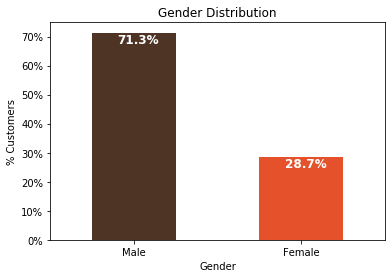

In [270]:
colors = ['#4D3425','#E4512B']
ax = (data_train['Gender'].value_counts()*100.0 /len(data_train)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

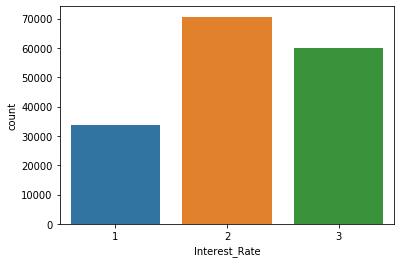

In [271]:
#Visualize the count of churn output
sns.countplot(data_train['Interest_Rate'])

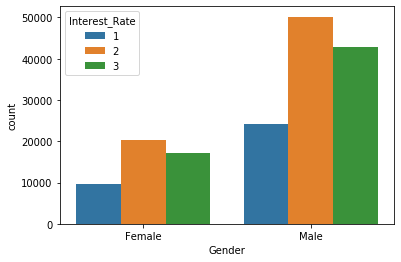

In [272]:
# Visualize the churn count for the internet service
sns.countplot(x='Gender', hue='Interest_Rate', data=data_train)

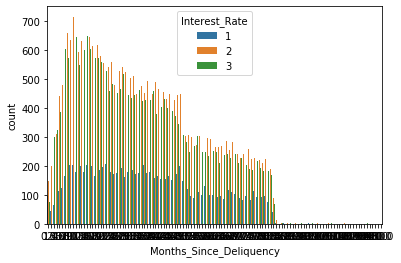

In [273]:
# Visualize the churn count for the internet service
sns.countplot(x='Months_Since_Deliquency', hue='Interest_Rate', data=data_train)

In [274]:
#Removing extra words from [Length_Employed] Column in training and testing data
#data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('year', '')
#data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('years', '')
#data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('s', '')
#data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('<', '')
#data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('+', '')
#data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('year', '')
#data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('years', '')
#data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('s', '')
#data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('<', '')
#data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('+', '')

In [275]:
data_train['Loan_Amount_Requested'] = data_train['Loan_Amount_Requested'].str.replace(',', '')
data_test['Loan_Amount_Requested'] = data_test['Loan_Amount_Requested'].str.replace(',', '')

In [276]:
#Remove customer IDs from the data set
data_train = data_train.iloc[:,1:]
data_test = data_test.iloc[:,1:]

In [277]:
#Dropping unwanted columns
data_train.drop(['Months_Since_Deliquency'],axis=1,inplace=True)
data_test.drop(['Months_Since_Deliquency'],axis=1,inplace=True)

In [278]:
#Convertin the predictor variable in a binary numeric variable
data_train['Gender'].replace(to_replace='Male', value=1, inplace=True)
data_train['Gender'].replace(to_replace='Female',  value=0, inplace=True)
data_test['Gender'].replace(to_replace='Male', value=1, inplace=True)
data_test['Gender'].replace(to_replace='Female',  value=0, inplace=True)

In [279]:
data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('year', '')
data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('years', '')
data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('s', '')
data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('<', '')
data_train['Length_Employed'] = data_train['Length_Employed'].apply(str).str.replace('+', '')
data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('year', '')
data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('years', '')
data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('s', '')
data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('<', '')
data_test['Length_Employed'] = data_test['Length_Employed'].apply(str).str.replace('+', '')

In [280]:
data_train['Length_Employed'] = data_train['Length_Employed'].astype(float)
data_train['Loan_Amount_Requested'] = data_train['Loan_Amount_Requested'].astype(int)
data_test['Length_Employed'] = data_test['Length_Employed'].astype(float)
data_test['Loan_Amount_Requested'] = data_test['Loan_Amount_Requested'].astype(int)

In [281]:
## Fill Missing Values

data_train['Length_Employed'] = data_train['Length_Employed'].fillna(data_train['Length_Employed'].mean())
data_test['Length_Employed'] = data_test['Length_Employed'].fillna(data_test['Length_Employed'].mean())

data_train['Annual_Income']=data_train['Annual_Income'].fillna(data_train['Annual_Income'].mean())
data_test['Annual_Income']=data_test['Annual_Income'].fillna(data_test['Annual_Income'].mean())
data_train['Home_Owner']=data_train['Home_Owner'].fillna(data_train['Home_Owner'].mode()[0])
data_test['Home_Owner']=data_test['Home_Owner'].fillna(data_test['Home_Owner'].mode()[0])

In [282]:
data_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,1.0,Rent,68000.000000,not verified,car,18.37,0,9,14,0,1
1,30000,4.0,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,12,24,0,3
2,24725,7.0,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,1,3
3,16000,1.0,Mortgage,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,1,3
4,17000,8.0,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,0,1


In [283]:
data_test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,27500,10.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,10,37,1
1,26000,10.0,Mortgage,110000.0,not verified,credit_card,11.37,0,6,23,1
2,6075,1.0,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,5,20,1
3,12000,10.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,6,8,1
4,35000,1.0,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,9,21,1


In [284]:
data_train.isnull().sum()

Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [285]:
data_test.isnull().sum()

Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
dtype: int64

In [286]:
data_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,1.0,Rent,68000.000000,not verified,car,18.37,0,9,14,0,1
1,30000,4.0,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,12,24,0,3
2,24725,7.0,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,1,3
3,16000,1.0,Mortgage,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,1,3
4,17000,8.0,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,0,1


In [287]:
data_test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,27500,10.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,10,37,1
1,26000,10.0,Mortgage,110000.0,not verified,credit_card,11.37,0,6,23,1
2,6075,1.0,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,5,20,1
3,12000,10.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,6,8,1
4,35000,1.0,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,9,21,1


In [288]:
data_train = pd.get_dummies(data_train, columns=['Purpose_Of_Loan'], prefix = ['Purpose_Of_Loan'])
data_train = pd.get_dummies(data_train, columns=['Income_Verified'], prefix = ['Income_Verified'])
data_train = pd.get_dummies(data_train, columns=['Home_Owner'], prefix = ['Home_Owner'])
data_test = pd.get_dummies(data_test, columns=['Home_Owner'], prefix = ['Home_Owner'])
data_test = pd.get_dummies(data_test, columns=['Purpose_Of_Loan'], prefix = ['Purpose_Of_Loan'])
data_test = pd.get_dummies(data_test, columns=['Income_Verified'], prefix = ['Income_Verified'])

In [289]:
data_train.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent'],
      dtype='object')

In [290]:
data_test.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Purpose_Of_Loan_car', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding',
       'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified'],
      dtype='object')

In [291]:
data_train.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Purpose_Of_Loan_car,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
0,7000,1.0,68000.000000,18.37,0,9,14,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,30000,4.0,73331.159434,14.93,0,12,24,0,3,0,...,0,0,1,0,0,1,0,0,0,0
2,24725,7.0,75566.400000,15.88,0,12,16,1,3,0,...,0,0,0,1,0,1,0,0,0,0
3,16000,1.0,56160.000000,14.34,3,16,22,1,3,0,...,0,0,0,1,0,1,0,0,0,0
4,17000,8.0,96000.000000,22.17,1,19,30,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [292]:
data_test.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified
0,27500,10.0,129000.0,12.87,0,10,37,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,26000,10.0,110000.0,11.37,0,6,23,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,6075,1.0,75000.0,6.83,2,5,20,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12000,10.0,73000.0,7.76,0,6,8,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,35000,1.0,156000.0,9.62,0,9,21,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [293]:
final_df=pd.concat([data_train,data_train],axis=0)

In [294]:
final_df['Interest_Rate']

0         1
1         3
2         3
3         3
4         1
         ..
164304    2
164305    2
164306    1
164307    3
164308    2
Name: Interest_Rate, Length: 328618, dtype: int64

In [295]:
final_df.shape

(328618, 31)

In [296]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [297]:
final_df.shape

(328618, 31)

In [298]:
final_df

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Purpose_Of_Loan_car,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
0,7000,1.0,68000.000000,18.37,0,9,14,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,30000,4.0,73331.159434,14.93,0,12,24,0,3,0,...,0,0,1,0,0,1,0,0,0,0
2,24725,7.0,75566.400000,15.88,0,12,16,1,3,0,...,0,0,0,1,0,1,0,0,0,0
3,16000,1.0,56160.000000,14.34,3,16,22,1,3,0,...,0,0,0,1,0,1,0,0,0,0
4,17000,8.0,96000.000000,22.17,1,19,30,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,20725,10.0,73331.159434,13.56,0,13,16,1,2,0,...,0,0,0,1,0,0,0,0,0,1
164305,6000,8.0,73331.159434,9.12,0,13,30,1,2,0,...,0,0,0,1,0,0,0,0,1,0
164306,20250,10.0,73331.159434,18.17,1,17,30,1,1,0,...,0,0,1,0,0,1,0,0,0,0
164307,10000,4.0,73331.159434,18.75,1,16,62,0,3,0,...,0,0,0,0,1,0,0,0,0,1


In [299]:
df_Train=final_df.iloc[:164309,:]
df_Test=final_df.iloc[164309:,:]

In [300]:
df_Train.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Purpose_Of_Loan_car,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
0,7000,1.0,68000.000000,18.37,0,9,14,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,30000,4.0,73331.159434,14.93,0,12,24,0,3,0,...,0,0,1,0,0,1,0,0,0,0
2,24725,7.0,75566.400000,15.88,0,12,16,1,3,0,...,0,0,0,1,0,1,0,0,0,0
3,16000,1.0,56160.000000,14.34,3,16,22,1,3,0,...,0,0,0,1,0,1,0,0,0,0
4,17000,8.0,96000.000000,22.17,1,19,30,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [301]:
df_Test.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Purpose_Of_Loan_car,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
0,7000,1.0,68000.000000,18.37,0,9,14,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,30000,4.0,73331.159434,14.93,0,12,24,0,3,0,...,0,0,1,0,0,1,0,0,0,0
2,24725,7.0,75566.400000,15.88,0,12,16,1,3,0,...,0,0,0,1,0,1,0,0,0,0
3,16000,1.0,56160.000000,14.34,3,16,22,1,3,0,...,0,0,0,1,0,1,0,0,0,0
4,17000,8.0,96000.000000,22.17,1,19,30,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [302]:
df_Train.shape

(164309, 31)

In [303]:
X_train=data_train.drop(['Interest_Rate'],axis=1)
y_train=data_train['Interest_Rate']

In [304]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

## Prediciton and selecting the Algorithm

In [305]:
import xgboost
classifier=xgboost.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [306]:
import xgboost
regressor=xgboost.XGBRegressor()

In [307]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [308]:
#Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [309]:
random_cv.estimator

In [310]:
regressor.fit(X_train,y_train)

In [311]:
y_pred=regressor.predict(df_Test.drop(['Interest_Rate'],axis=1))

In [312]:
pred=pd.DataFrame(y_pred)
data_submission = pd.read_csv('C:/Users/Vidush/Desktop/Dataset/JanataHack Machine Learning for Banking/sample_submission_HSqiq1Q.csv')
datasets=pd.concat([data_submission['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Interest_Rate']
datasets.to_csv('sample_submission.csv',index=False)